# Requirements


In [1]:
import pandas as pd
import geopandas as gpd
import requests
from io import BytesIO, StringIO
from zipfile import ZipFile
import pyreadr
import tempun
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [165]:
# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 600
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 6

figpath = "SDAM_data/social_diversity/socdiv_figures/"

def save_figure(fig, fig_name):
    #each figure to be saved in four different versions
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".svg")
    fig.savefig("../figures/" + fig_name + ".png")

# Download, unzip and load data from target article

In [4]:
# download zipped data from the target article's OSF repository
resp = requests.get("https://osf.io/9w2t8/download")
resp

<Response [200]>

In [5]:
# look what files we have in the zip archive
myzipfile = ZipFile(BytesIO(resp.content))
for name in myzipfile.namelist():
    print(name)

2MSP_SPC1.R
2SPC1_MSP.R
fRegrDat.R
MSP_data_4mar2021.csv
MSP_SOM_SocArxiv_15sep21.pdf
MSP_TableData.Rdata
PolsVars.Rdata


In [6]:
# save the zip archive locally
myzipfile.extractall(path="../data/MSP_SOM")

In [7]:
# read the R data
result = pyreadr.read_r('../data/MSP_SOM/MSP_TableData.Rdata')
result.keys()# also works for Rds

odict_keys(['AggrDat'])

In [8]:
MSP_aggr = result["AggrDat"]
MSP_aggr

,NGA,PolID,Time,MSP,SPC1,Scale,Gov,Money,Info,MilTech,...,EnvPC2,uniq,MSPprim,minMSP,MSP_sum,MSP_approv,infA,MSP_this,MSP_after,MSP_agen
0,Latium,ItLatCA,-3600,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,y,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
1,Latium,ItLatCA,-3500,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
2,Latium,ItLatCA,-3400,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
3,Latium,ItLatCA,-3300,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
4,Latium,ItLatCA,-3200,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,North Colombia,CoTairo,1500,NaN,4.505560,-0.445141,0.322222,0.500000,0.069231,8.4,...,0.986268,y,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN
1380,Lowland Andes,EcJivaE,1600,0.007812,2.969686,-2.294283,0.000000,0.500000,0.000000,15.0,...,-0.117508,y,0.0,0.0,0.0,1.0,0.0,0.007812,0.007812,0.007812
1381,Lowland Andes,EcJivaE,1700,0.007812,2.969686,-2.294283,0.000000,0.500000,0.000000,12.0,...,-0.117508,y,0.0,0.0,0.0,1.0,0.0,0.007812,0.007812,0.007812
1382,Lowland Andes,EcJivaE,1800,0.007812,2.969686,-2.294283,0.000000,0.500000,0.000000,12.0,...,-0.117508,n,0.0,0.0,0.0,1.0,0.0,0.007812,0.007812,0.007812


In [9]:
MSP_aggr.columns

Index(['NGA', 'PolID', 'Time', 'MSP', 'SPC1', 'Scale', 'Gov', 'Money', 'Info',
       'MilTech', 'Cavalry', 'Agri', 'Pastor', 'EnvPC1', 'EnvPC2', 'uniq',
       'MSPprim', 'minMSP', 'MSP_sum', 'MSP_approv', 'infA', 'MSP_this',
       'MSP_after', 'MSP_agen'],
      dtype='object')

In [10]:
### regional constraints to AM
NGA_AM = ["Latium", "Paris Basin", "Upper Egypt", "Konya Plain"]

In [11]:
MSP_AM = MSP_aggr[(MSP_aggr["NGA"].isin(NGA_AM)) & (MSP_aggr["Time"].between(-1000,1000))]

In [12]:
for time in range(-1000, 1100, 100):
    print(time)

-1000
-900
-800
-700
-600
-500
-400
-300
-200
-100
0
100
200
300
400
500
600
700
800
900
1000


In [13]:
MSP_AM

,NGA,PolID,Time,MSP,SPC1,Scale,Gov,Money,Info,MilTech,...,EnvPC2,uniq,MSPprim,minMSP,MSP_sum,MSP_approv,infA,MSP_this,MSP_after,MSP_agen
26,Latium,ItLatIA,-1000,0.125,3.036791,-1.675532,0.090909,0.000000,0.192308,27.2,...,0.204119,y,0.0,1.0,4.0,1.0,1.0,0.125,NaN,0.125
27,Latium,ItLatIA,-900,0.125,3.036791,-1.675532,0.090909,0.000000,0.192308,27.2,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125,NaN,0.125
28,Latium,ItLatIA,-800,0.125,3.036791,-1.675532,0.090909,0.000000,0.192308,27.2,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125,NaN,0.125
29,Latium,ItRomRg,-700,0.125,4.601192,0.234420,0.218182,0.166667,0.607692,27.6,...,0.204119,y,0.0,1.0,4.0,1.0,1.0,0.125,NaN,0.125
30,Latium,ItRomRg,-600,0.125,4.715255,0.499686,0.218182,0.166667,0.607692,29.6,...,0.204119,y,0.0,1.0,4.0,1.0,1.0,0.125,NaN,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,Konya Plain,TrERom*,600,1.000,7.684670,4.133106,0.909091,0.833333,0.992308,38.0,...,-0.103601,y,1.0,1.0,7.0,1.0,0.0,1.000,1.0,1.000
547,Konya Plain,TrByzM1,700,1.000,7.405033,3.604674,0.909091,0.833333,0.923077,38.0,...,-0.103601,y,1.0,1.0,7.0,1.0,0.0,1.000,1.0,1.000
548,Konya Plain,TrByzM1,800,1.000,7.483801,3.787864,0.909091,0.833333,0.923077,38.0,...,-0.103601,y,1.0,1.0,7.0,1.0,0.0,1.000,1.0,1.000
549,Konya Plain,TrByzM2,900,1.000,7.446035,3.677988,0.909091,0.833333,0.923077,37.0,...,-0.103601,y,1.0,1.0,7.0,1.0,0.0,1.000,1.0,1.000


In [14]:
MSP_AM[(MSP_AM["NGA"]=="Konya Plain") & (MSP_AM["Time"].between(-300, 800))]

,NGA,PolID,Time,MSP,SPC1,Scale,Gov,Money,Info,MilTech,...,EnvPC2,uniq,MSPprim,minMSP,MSP_sum,MSP_approv,infA,MSP_this,MSP_after,MSP_agen
541,Konya Plain,TrLysim,-300,0.088388,6.671153,2.436400,0.700000,0.833333,0.861538,29.5,...,-0.103601,y,0.0,1.0,3.5,1.0,0.0,0.088388,0.088388,0.088388
542,Konya Plain,TrCappL,-100,0.125000,6.071229,1.674921,0.530000,0.833333,0.638462,26.8,...,-0.103601,y,0.0,1.0,4.0,1.0,0.0,0.125000,0.125000,0.125000
543,Konya Plain,TrRomDm,300,0.353553,7.874134,4.740122,0.827273,0.833333,0.915385,32.4,...,-0.103601,y,0.5,1.0,5.5,1.0,0.0,0.353553,0.353553,0.353553
544,Konya Plain,TrERom*,400,1.000000,7.711431,4.193963,0.909091,0.833333,0.992308,38.0,...,-0.103601,y,1.0,1.0,7.0,1.0,0.0,1.000000,1.000000,1.000000
545,Konya Plain,TrERom*,500,1.000000,7.781289,4.356866,0.909091,0.833333,0.992308,38.0,...,-0.103601,y,1.0,1.0,7.0,1.0,0.0,1.000000,1.000000,1.000000
546,Konya Plain,TrERom*,600,1.000000,7.684670,4.133106,0.909091,0.833333,0.992308,38.0,...,-0.103601,y,1.0,1.0,7.0,1.0,0.0,1.000000,1.000000,1.000000
547,Konya Plain,TrByzM1,700,1.000000,7.405033,3.604674,0.909091,0.833333,0.923077,38.0,...,-0.103601,y,1.0,1.0,7.0,1.0,0.0,1.000000,1.000000,1.000000
548,Konya Plain,TrByzM1,800,1.000000,7.483801,3.787864,0.909091,0.833333,0.923077,38.0,...,-0.103601,y,1.0,1.0,7.0,1.0,0.0,1.000000,1.000000,1.000000


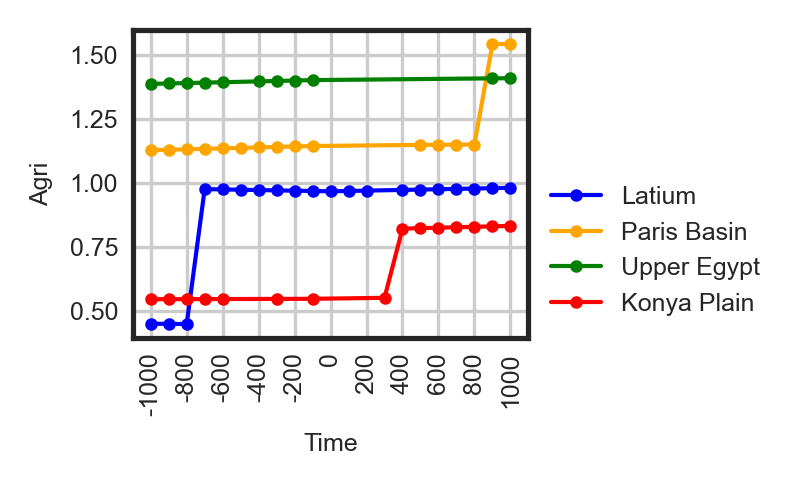

In [15]:
fig, ax = plt.subplots(figsize=(2.6, 1.6), tight_layout=True)
var = "Agri"

for region, color in zip(NGA_AM, ["blue", "orange", "green", "red"]):
        MSP_AM[MSP_AM["NGA"]==region].plot(x="Time", y=var, style="-o", markersize=2, linewidth=1 ,label=region, color=color, ax=ax)
 #       MSP_AM[MSP_AM["NGA"]==region].plot(x="Time", y="Agri", color=color, ax=ax)
ax.set_xticks(range(-1000,1200,200))
ax.set_xticklabels(range(-1000,1200,200))
ax.grid(visible=True)
ax.xaxis.set_tick_params(rotation=90)

plt.ylabel(var)
plt.legend(loc="lower left", bbox_to_anchor=(1, 0))

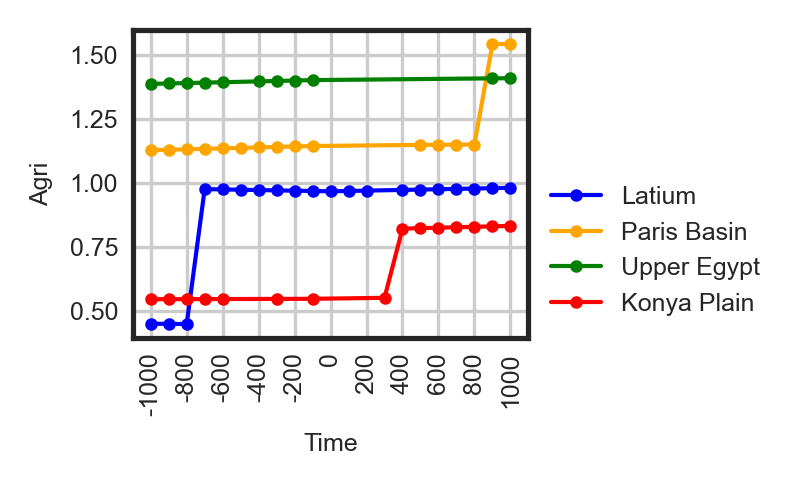

In [16]:
fig, ax = plt.subplots(figsize=(2.6, 1.6), tight_layout=True)

for region, color in zip(NGA_AM, ["blue", "orange", "green", "red"]):
    MSP_AM[MSP_AM["NGA"]==region].plot(x="Time", y="Agri", style="-o", markersize=2, linewidth=1 ,label=region, color=color, ax=ax)
#       MSP_AM[MSP_AM["NGA"]==region].plot(x="Time", y="Agri", color=color, ax=ax)
ax.set_xticks(range(-1000,1200,200))
ax.set_xticklabels(range(-1000,1200,200))
ax.grid(visible=True)
ax.xaxis.set_tick_params(rotation=90)

plt.ylabel("Agri")
plt.legend(loc="lower left", bbox_to_anchor=(1, 0))

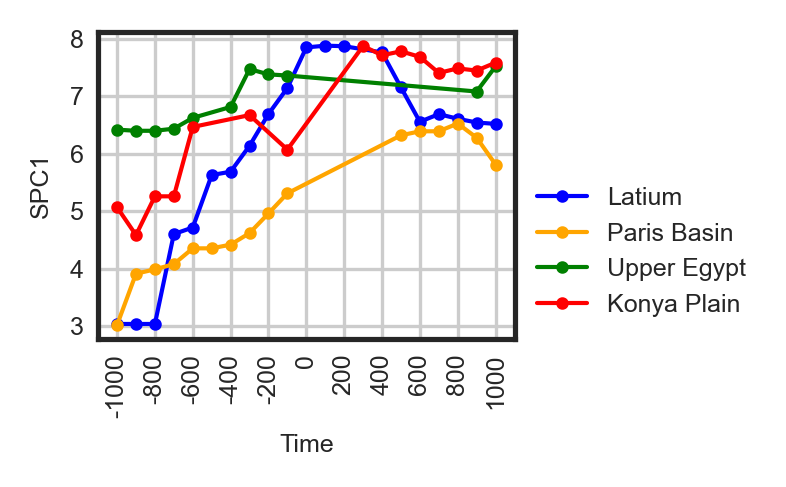

In [17]:
fig, ax = plt.subplots(figsize=(2.6, 1.6), tight_layout=True)

for region, color in zip(NGA_AM, ["blue", "orange", "green", "red"]):
    MSP_AM[MSP_AM["NGA"]==region].plot(x="Time", y="SPC1", style="-o", markersize=2, linewidth=1, label=region, color=color, ax=ax)
#       MSP_AM[MSP_AM["NGA"]==region].plot(x="Time", y="Agri", color=color, ax=ax)
ax.set_xticks(range(-1000,1200,200))
ax.set_xticklabels(range(-1000,1200,200))
ax.grid(visible=True)
ax.xaxis.set_tick_params(rotation=90)

plt.ylabel("SPC1")
plt.legend(loc="lower left", bbox_to_anchor=(1, 0))

In [18]:
# SPC1 should be calculated as a log10 of the total population,
# i.e. SPC1 value used as an exponent to 10 should give you the total population
# why it differs from NGA to NGA?

In [19]:
MSP_AM[(MSP_AM["NGA"]=="Latium") & (MSP_AM["Time"]==100)]["SPC1"]

37    7.879724
Name: SPC1, dtype: float64

In [20]:
np.log10(6500000)

6.812913356642856

In [21]:
10**7.879724

75809564.19040497

# Comparison with data from Turchin 2018

In [22]:
resp = requests.get("https://www.pnas.org/highwire/filestream/787135/field_highwire_adjunct_files/1/pnas.1708800115.sd01.csv")
SC2018 = pd.read_csv(BytesIO(resp.content))
SC2018

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,irep
0,Big Island Hawaii,Hawaii1,1000,3.636111,2.585663,2.432944,0.100000,0.090909,0.100000,0.100000,0.100000,1.8,1
1,Big Island Hawaii,Hawaii2,1200,3.672515,3.357152,2.414818,0.100000,0.090909,0.090909,0.150000,0.000000,1.8,1
2,Big Island Hawaii,Hawaii2,1300,4.023075,3.357152,2.561987,0.100000,0.090909,0.090909,0.150000,0.000000,1.8,1
3,Big Island Hawaii,Hawaii2,1400,4.245918,3.357152,3.524193,0.100000,0.090909,0.181818,0.150000,0.000000,1.8,1
4,Big Island Hawaii,Hawaii2,1500,4.320653,3.357152,3.740528,0.100000,0.172727,0.181818,0.150000,0.000000,1.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,Valley of Oaxaca,MxAlb3B,700,3.827869,3.921670,4.415906,1.934910,0.640000,0.044444,0.557143,0.125000,0.9,20
8276,Valley of Oaxaca,MxAlb5*,900,3.974330,1.736243,3.837609,2.019503,0.700000,0.050000,0.560000,0.125000,0.0,20
8277,Valley of Oaxaca,MxAlb5*,1000,3.974330,3.529950,3.837609,2.143533,0.700000,0.050000,0.560000,0.125000,0.0,20
8278,Yemeni Coastal Plain,YeQasmi,1700,4.885298,4.608362,3.944354,2.400000,0.572727,0.272727,0.833333,0.814286,5.0,20


In [23]:
SC2018[(SC2018["NGA"]=="Latium") & (SC2018["Time"]==100)]

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,irep
164,Latium,ItRomPr,100,7.745301,6.763428,6.022638,5.536598,0.645455,0.991667,0.833333,1.0,5.0,1
578,Latium,ItRomPr,100,7.715798,6.763428,6.055327,5.680508,0.645455,0.991667,0.833333,1.0,5.0,2
992,Latium,ItRomPr,100,7.735197,6.763428,5.996580,5.693186,0.645455,0.991667,0.833333,1.0,5.0,3
1406,Latium,ItRomPr,100,7.731303,6.763428,6.072319,5.622608,0.645455,0.991667,0.833333,1.0,5.0,4
1820,Latium,ItRomPr,100,7.768921,6.763428,6.022523,5.751172,0.645455,0.991667,0.833333,1.0,5.0,5
2234,Latium,ItRomPr,100,7.733121,6.763428,6.014352,5.802454,0.645455,0.991667,0.833333,1.0,5.0,6
2648,Latium,ItRomPr,100,7.752463,6.763428,6.034026,5.646250,0.645455,0.991667,0.833333,1.0,5.0,7
3062,Latium,ItRomPr,100,7.726847,6.763428,6.020249,5.775027,0.645455,0.991667,0.833333,1.0,5.0,8
3476,Latium,ItRomPr,100,7.721295,6.763428,5.979394,5.684063,0.645455,0.991667,0.833333,1.0,5.0,9
3890,Latium,ItRomPr,100,7.735981,6.763428,6.049088,5.759716,0.645455,0.991667,0.833333,1.0,5.0,10


In [24]:
SC2018[(SC2018["NGA"]=="Latium") & (SC2018["Time"]==100)]["PolPop"].max() #["PolPop"]

7.775635323

In [25]:
SC2018[(SC2018["NGA"]=="Latium") & (SC2018["Time"]==100)]["PolPop"].mean()

7.733127805050001

In [26]:
SC2018[(SC2018["NGA"]=="Latium") & (SC2018["Time"]==-100)]["PolPop"].mean()

7.4828190477500005

In [27]:
10**7.775635323

59653416.65834292

In [28]:
# mean values across all 20 iterations
SC2018_mean = pd.DataFrame(SC2018.groupby(["NGA", "Time"]).mean()).reset_index()
SC2018_mean

,NGA,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,irep
0,Big Island Hawaii,1000,3.057443,3.004792,2.295574,0.100000,0.090909,0.100000,0.100000,0.100000,1.8,10.5
1,Big Island Hawaii,1200,3.737784,3.319389,2.731651,0.100000,0.090909,0.090909,0.150000,0.000000,1.8,10.5
2,Big Island Hawaii,1300,4.015924,3.319389,2.912740,0.100000,0.090909,0.090909,0.150000,0.000000,1.8,10.5
3,Big Island Hawaii,1400,4.225023,3.319389,3.010931,0.100000,0.090909,0.181818,0.150000,0.000000,1.8,10.5
4,Big Island Hawaii,1500,4.535502,3.319389,3.201916,0.100000,0.172727,0.181818,0.150000,0.000000,1.8,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...
409,Valley of Oaxaca,700,3.921307,3.614111,4.357964,1.905576,0.640000,0.044444,0.557143,0.125000,0.9,10.5
410,Valley of Oaxaca,900,3.988906,3.343824,3.876510,1.931539,0.700000,0.050000,0.560000,0.125000,0.0,10.5
411,Valley of Oaxaca,1000,3.988906,3.611728,3.876510,2.035290,0.700000,0.050000,0.560000,0.125000,0.0,10.5
412,Yemeni Coastal Plain,1700,5.039726,4.952644,3.425286,2.400000,0.572727,0.272727,0.833333,0.814286,5.0,10.5


In [29]:
SC2018_AM = SC2018_mean[SC2018_mean["Time"].between(-1000,1000)]

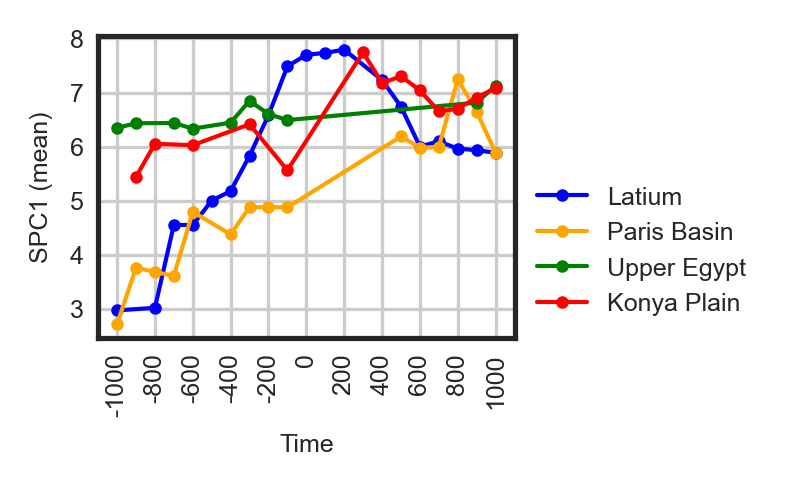

In [30]:
fig, ax = plt.subplots(figsize=(2.6, 1.6), tight_layout=True)

for region, color in zip(NGA_AM, ["blue", "orange", "green", "red"]):
    SC2018_AM[SC2018["NGA"]==region].plot(x="Time", y="PolPop", style="-o", markersize=2, linewidth=1, label=region, color=color, ax=ax)
#       MSP_AM[MSP_AM["NGA"]==region].plot(x="Time", y="Agri", color=color, ax=ax)
ax.set_xticks(range(-1000,1200,200))
ax.set_xticklabels(range(-1000,1200,200))
ax.grid(visible=True)
ax.xaxis.set_tick_params(rotation=90)

plt.ylabel("SPC1 (mean)")
plt.legend(loc="lower left", bbox_to_anchor=(1,0))

# What about the missing dates in the data?

In [31]:
MSP_aggr[MSP_aggr["NGA"]=="Upper Egypt"]

,NGA,PolID,Time,MSP,SPC1,Scale,Gov,Money,Info,MilTech,...,EnvPC2,uniq,MSPprim,minMSP,MSP_sum,MSP_approv,infA,MSP_this,MSP_after,MSP_agen
180,Upper Egypt,EgBadar,-4400,0.088388,2.990306,-2.293221,0.100000,0.150000,0.169231,5.3,...,2.075667,y,0.5,1.0,3.5,1.0,0.0,NaN,0.088388,NaN
181,Upper Egypt,EgBadar,-4300,0.088388,2.990306,-2.293221,0.100000,0.150000,0.169231,5.3,...,2.075667,n,0.5,1.0,3.5,1.0,0.0,NaN,0.088388,NaN
182,Upper Egypt,EgBadar,-4200,0.088388,2.990306,-2.293221,0.100000,0.150000,0.169231,5.3,...,2.075667,n,0.5,1.0,3.5,1.0,0.0,NaN,0.088388,NaN
183,Upper Egypt,EgBadar,-4100,0.088388,2.990306,-2.293221,0.100000,0.150000,0.169231,5.3,...,2.075667,n,0.5,1.0,3.5,1.0,0.0,NaN,0.088388,NaN
184,Upper Egypt,EgBadar,-4000,0.088388,2.990306,-2.293221,0.100000,0.150000,0.169231,5.3,...,2.075667,n,0.5,1.0,3.5,1.0,0.0,NaN,0.088388,NaN
185,Upper Egypt,EgBadar,-3900,0.088388,2.990306,-2.293221,0.100000,0.150000,0.169231,5.3,...,2.075667,n,0.5,1.0,3.5,1.0,0.0,NaN,0.088388,NaN
186,Upper Egypt,EgNaqa1,-3800,0.088388,3.147150,-2.579097,0.100000,0.500000,0.161538,8.2,...,2.075667,y,0.5,1.0,3.5,1.0,0.0,NaN,0.088388,NaN
187,Upper Egypt,EgNaqa1,-3700,0.088388,4.041284,-0.463489,0.100000,0.500000,0.161538,8.2,...,2.075667,y,0.5,1.0,3.5,1.0,0.0,NaN,0.088388,NaN
188,Upper Egypt,EgNaqa1,-3600,0.088388,4.246345,0.011439,0.100000,0.500000,0.161538,8.2,...,2.075667,y,0.5,1.0,3.5,1.0,0.0,NaN,0.088388,NaN
189,Upper Egypt,EgNaqa2,-3500,0.088388,4.401237,0.202062,0.109091,0.500000,0.246154,11.8,...,2.075667,y,0.5,1.0,3.5,1.0,0.0,NaN,0.088388,NaN


In [32]:
MSP_aggr[MSP_aggr["NGA"]=="Latium"]

,NGA,PolID,Time,MSP,SPC1,Scale,Gov,Money,Info,MilTech,...,EnvPC2,uniq,MSPprim,minMSP,MSP_sum,MSP_approv,infA,MSP_this,MSP_after,MSP_agen
0,Latium,ItLatCA,-3600,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,y,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
1,Latium,ItLatCA,-3500,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
2,Latium,ItLatCA,-3400,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
3,Latium,ItLatCA,-3300,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
4,Latium,ItLatCA,-3200,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
5,Latium,ItLatCA,-3100,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
6,Latium,ItLatCA,-3000,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
7,Latium,ItLatCA,-2900,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
8,Latium,ItLatCA,-2800,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000
9,Latium,ItLatCA,-2700,0.125000,3.088123,-1.574100,0.009091,0.150000,0.138462,12.6,...,0.204119,n,0.0,1.0,4.0,1.0,1.0,0.125000,NaN,0.125000


# Comparison with data from Turchin et al. 2021 ("An integrative approach to estimating productivity in past societies using Seshat: Global History Databank")


In [33]:
# Compare with data from Turchin et al. 2021, An integrative approach...
# look what files we have in the zip archive
resp = requests.get("https://osf.io/nrmcv/download")
myzipfile = ZipFile(BytesIO(resp.content))
for name in myzipfile.namelist():
    print(name)

Agri.Rdata
FAOSTAT_yields_7-6-2018.csv
HistYield_out.csv
Main_script.R


In [34]:
myzipfile.extractall("../data/Agri")

In [35]:
# read the R data
result = pyreadr.read_r('../data/Agri/Agri.Rdata')
result.keys()#

odict_keys(['NGAs', 'SeshatData', 'Practices', 'ArtSelect', 'PaleoClimate', 'HY'])

In [36]:
HY = result["HY"]
HY = HY[HY["Time"].between(-1000,1000)]
HY

,Latium,Paris Basin,Iceland,Upper Egypt,Niger Inland Delta,Ghanaian Coast,Susiana,Konya Plain,Yemeni Coastal Plain,Kachi Plain,...,Valley of Oaxaca,Cahokia,Finger Lakes,Cuzco,North Colombia,Lowland Andes,Big Island Hawaii,Chuuk Islands,Oro PNG,Time
90,0.451061,1.128746,0.0,1.387979,0.443480,0.0,0.771018,0.546680,0.325175,0.611570,...,0.305384,0.162869,0.000000,0.052741,0.041462,0.068311,0.000000,NaN,NaN,-1000.0
91,0.450500,1.130589,0.0,1.389627,0.445820,0.0,0.771395,0.546871,0.336544,0.608748,...,0.325225,0.172108,0.000000,0.056381,0.044047,0.072418,0.000000,NaN,NaN,-900.0
92,0.449939,1.132432,0.0,1.391275,0.448160,0.0,0.771773,0.547062,0.347914,0.999777,...,0.354741,0.186272,0.000000,0.061731,0.047925,0.078630,0.000000,NaN,NaN,-800.0
93,0.976909,1.134275,0.0,1.392923,0.450499,0.0,0.772150,0.547253,0.359284,0.995120,...,0.384391,0.200269,0.000000,0.072512,0.051803,0.084814,0.000000,NaN,NaN,-700.0
94,0.975689,1.136119,0.0,1.394571,0.452839,0.0,0.772527,0.547444,0.370654,0.990463,...,0.414174,0.214101,0.000000,0.078420,0.055679,0.090969,0.000000,NaN,NaN,-600.0
95,0.974470,1.137962,0.0,1.396219,0.455179,0.0,0.772904,0.547635,0.382024,0.985806,...,0.515144,0.227767,0.000000,0.140093,0.059554,0.097095,0.000000,NaN,NaN,-500.0
96,0.973250,1.139805,0.0,1.397867,0.457519,0.0,0.773282,0.547826,0.393393,0.981149,...,0.550000,0.241267,0.000000,0.150119,0.063427,0.103193,0.000000,NaN,NaN,-400.0
97,0.972031,1.141648,0.0,1.399515,0.459859,0.0,0.773659,0.548017,0.404763,0.976492,...,0.596261,0.259497,0.000000,0.163335,0.068594,0.111363,0.000000,NaN,NaN,-300.0
98,0.970811,1.143492,0.0,1.401164,0.462199,0.0,0.774036,0.548208,0.416133,0.971836,...,0.631452,0.272638,0.000000,0.173596,0.072465,0.117398,0.000000,NaN,NaN,-200.0
99,0.969592,1.145335,0.0,1.402812,0.464539,0.0,0.774413,0.548399,0.427503,0.967179,...,0.678098,0.290453,0.000000,0.187084,0.077628,0.125496,0.000000,NaN,NaN,-100.0


In [37]:
result["SeshatData"]

,NGA,Variable,Value.From,Value.To,Value.Note,Date.From,Date.To
0,Big Island Hawaii,Carbohydrate Source 1,sweet potato,,,750,1800
1,Big Island Hawaii,Cropping System,swidden,,,750,1400
2,Big Island Hawaii,Cropping System Coefficient,0.23,,inferred,750,1400
3,Big Island Hawaii,Fertilizer Coefficient,1.3,,,750,1900
4,Big Island Hawaii,Fertilizers,present,,inferred,750,1800
...,...,...,...,...,...,...,...
325,Yemeni Coastal Plain,Cropping System Coefficient,1,,,-1500,2000
326,Yemeni Coastal Plain,Fertilizer Coefficient,1.65,,,-1500,2000
327,Yemeni Coastal Plain,Fertilizers,present,,,-1500,2001
328,Yemeni Coastal Plain,Irrigation,present,,,-1500,2001


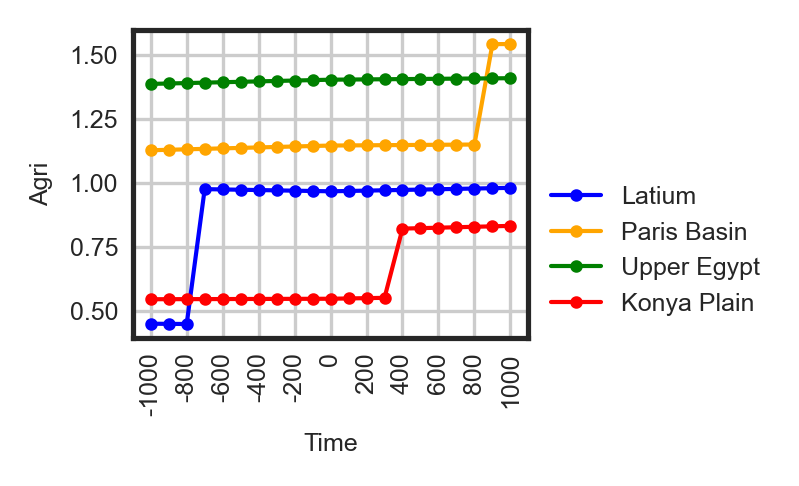

In [38]:
fig, ax = plt.subplots(figsize=(2.6, 1.6), tight_layout=True)

for region, color in zip(NGA_AM, ["blue", "orange", "green", "red"]):
    HY.plot(x="Time", y=region, style="-o", markersize=2, linewidth=1, label=region, color=color, ax=ax)
#       MSP_AM[MSP_AM["NGA"]==region].plot(x="Time", y="Agri", color=color, ax=ax)
ax.set_xticks(range(-1000,1200,200))
ax.set_xticklabels(range(-1000,1200,200))
ax.grid(visible=True)
ax.xaxis.set_tick_params(rotation=90)
plt.ylabel("Agri")
plt.legend(loc="lower left", bbox_to_anchor=(1,0))

# NGAs

In [39]:
NGAs = gpd.GeoDataFrame()


In [40]:
NGAs_list = [gpd.read_file("../data/"+ filename, driver="GeoJSON") for filename in ["LatiumWGS84.geojson", "ParisWGS84.geojson", "EgyptWGS84.geojson", "KonyaWGS84.geojson"]]
NGAs = pd.concat(NGAs_list)

In [41]:
pleiades_regions = gpd.read_file('../data/pleiades_regions.geojson', driver='GeoJSON')
pleiades_regions_west = gpd.read_file('../data/pleiades_regions_west.geojson', driver='GeoJSON')

(23.0, 55.5)

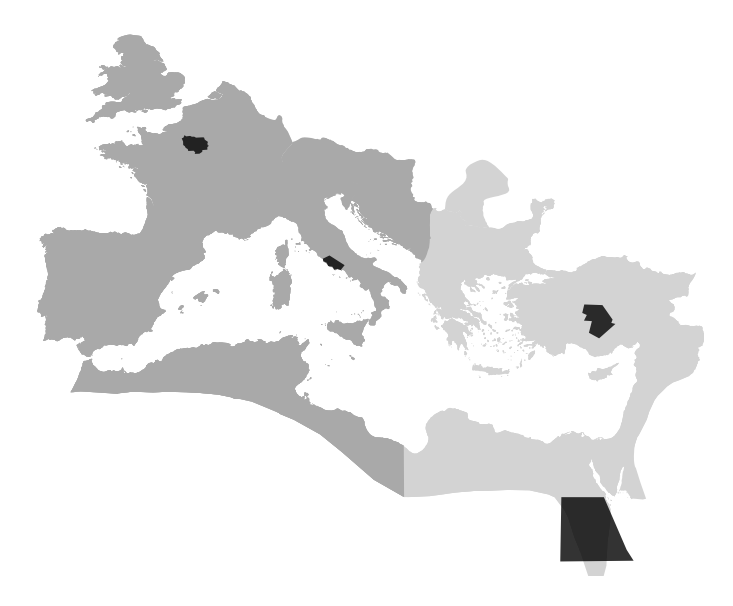

In [42]:
fig, ax = plt.subplots(figsize=(2.6, 2), tight_layout=True)
pleiades_regions.plot(ax=ax, color="lightgrey")
pleiades_regions_west.plot(ax=ax, color="darkgrey")

for n in range(4):
    NGAs_list[n].plot(ax=ax, color="black", alpha=0.8)
ax.set_axis_off()
ax.set_xlim(-10, 41)
ax.set_ylim(23, 55.5)

In [43]:
save_figure(fig, "roman_world_117CE")

# Greek inscriptions (PHI) and Latin inscriptions (LIRE)

In [44]:
# find local version of the input dataset
local_paths = !find ~/Projects -name "LIRE_v1-2.parquet"
print(local_paths)

['/Users/kasev/Projects/LIRE_ETL/data/large_data/LIRE_v1-2.parquet']


In [45]:
# read LIRE dataset from zenodo or locally, if already available
try:
    LIRE = gpd.read_parquet(local_paths[0])
except:# !!! use carefully - takes time
    LIRE = gpd.read_file("https://zenodo.org/record/5074774/files/LIREg.geojson?download=1", driver="geoJSON")
    LIRE.to_parquet("../data/large_files/LIRE_v1-2.parquet")

In [46]:
LIRE["random_dates"] = LIRE.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=1000,), axis=1)

In [47]:
# find local version  of the PHI dataset (if available)
local_paths = !find ~/Projects -name "PHI_v1.0.json"
print(local_paths)

['/Users/kasev/Projects/RBB_commentary/data/large_files/PHI_v1.0.json']


In [48]:
try:
    PHI = pd.read_json(local_paths[0])
except:
    PHI = pd.read_json("https://zenodo.org/record/4972968/files/PHI_v1.0.json?download=1")
    PHI.to_json("../data/large_files/PHI_v1.0.json")

In [49]:
len(PHI[(PHI["not_before"].notnull()) | (PHI["not_after"].notnull())])

131904

In [50]:
PHI["random_dates"] = PHI.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=1000,), axis=1)

In [51]:
var_data_lire = []
for var_n in range(1000):
    var_data_lire.append([var[var_n] for var in LIRE["random_dates"] if var !=None])

In [52]:
var_data_phi = []
for var_n in range(1000):
    var_data_phi.append([var[var_n] for var in PHI["random_dates"] if var !=None])

In [53]:
PHI.head(20)

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata,data,...,lemmata,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,random_dates
0,/text/1?location=1701&patt=&bookid=4&offset=0&...,IG I³,1,Regions\nAttica (IG I-III),IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,,12,1\n\n\n\n5\n\n\n\n\n10\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,...,"[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σαλ...",c. 510-500 a.,"{'or': None, 'not_before': -511, 'not_after': ...",-511.0,-499.0,None,"[range, phase, ca]",None,None,"[-501, -503, -504, -505, -506, -509, -501, -50..."
1,/text/2?location=1701&patt=&bookid=4&offset=0&...,IG I³,2,Regions\nAttica (IG I-III),IG I³\n2,Att. — non-stoich. — c. 500 a.,,14,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,...,"[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελε...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,"[-504, -502, -503, -502, -500, -504, -495, -49..."
2,/text/3?location=1701&patt=&bookid=4&offset=0&...,IG I³,3,Regions\nAttica (IG I-III),IG I³\n3,Att. — stoich. 21 — 490-480 a.,,13,1\n\n\n\n5\n\n\n\n\n10\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,...,"[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγον...",490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,"[-488, -484, -488, -485, -482, -482, -483, -48..."
3,/text/4?location=1701&patt=&bookid=4&offset=0&...,IG I³,4,Regions\nAttica (IG I-III),IG I³\n4,Att. — stoich. 38 — 485/4 a.,,56,face A.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n15\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,...,"[τὶς, φρορὰν, πεντέκοντα, δραχμή, τ, πρᾶχσιν, ...",485/4 a.,"{'or': None, 'not_before': -485, 'not_after': ...",-485.0,-484.0,None,[range],None,None,"[-484, -484, -484, -485, -484, -485, -484, -48..."
4,/text/5?location=1701&patt=&bookid=4&offset=0&...,IG I³,5,Regions\nAttica (IG I-III),IG I³\n5,Att. — c. 500 a.,,6,1\n\n\n\n5\n,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,...,"[ἔδοχσεν, τει, βολει, δέμοι, παραιβάτες, γραμμ...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,"[-496, -504, -502, -498, -502, -500, -501, -49..."
5,/text/6?location=1701&patt=&bookid=4&offset=0&...,IG I³,6,Regions\nAttica (IG I-III),IG I³\n6,Att. — stoich. 23/11 — ante 460 a.,,160,face A.BM 309.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n...,— — — — — — — — — — — — —\n[․․․․․․15․․․․․․․] δ...,...,"[δραχμεισι, τες, μένος, δεμο, πόλεον, δοκέω, ἀ...",ante 460 a.,"{'or': None, 'not_before': None, 'not_after': ...",NaN,-461.0,None,[ante],None,None,"[-461, -461, -461, -461, -461, -461, -461, -46..."
6,/text/7?location=1701&patt=&bookid=4&offset=0&...,IG I³,7,Regions\nAttica (IG I-III),IG I³\n7,Att. — stoich. 40 — 460-450,,28,frg. a.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n13\n\n\nf...,[ἔδοχσεν τε͂]ι βο[λ]ε͂[ι καὶ το͂ι δέμοι· ․․6․․...,...,"[ἔδοχσεν, τει, βολει, δέμοι, πρυτανεύω, γραμμα...",460-450,"{'or': None, 'not_before': -460, 'not_after': ...",-460.0,-450.0,None,[range],None,None,"[-453, -459, -456, -451, -459, -457, -453, -45..."
7,/text/8?location=1701&patt=&bookid=4&offset=0&...,IG I³,8,Regions\nAttica (IG I-III),IG I³\n8,Att. — stoich. 32 — 460-450,,26,frg. a.1\n\n\n\n5\n\n\n\n\n10\n\n\nfrg. b.12\n...,[․․5․․]#⁷ον ℎὰ ο[․․․․․․․․․21․․․․․․․․․․]\nα περ...,...,"[οὗτος, δέμω, ἀντίβιος, λέγω, ἄλλος, Καλλίμαχο...",460-450,"{'or': None, 'not_before': -460, 'not_after': ...",-460.0,-450.0,None,[range],None,None,"[-460, -451, -459, -453, -457, -453, -454, -45..."
8,/text/9?location=1701&patt=&bookid=4&offset=0&...,IG I³,9,Regions\nAttica (IG I-III),IG I³\n9,Att. — stoich. 24 — c. 458 a.,,17,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n15\n\n,[ἔδοχσεν τε͂ι βο]λε̣͂ι καὶ το͂[ι δέμ]-\n[οι· ․...,...,"[ἔδοχσεν, τει, βολει, δέμοι, ντὶς, πρυτανεύω, ...",c. 458 a.,"{'or': None, 'not_before': -463, 'not_after': ...",-463.0,-453.0,None,"[exact, phase, ca]",None,None,"[-461, -455, -4

CPU times: user 19.7 s, sys: 25.7 s, total: 45.3 s
Wall time: 2min 15s


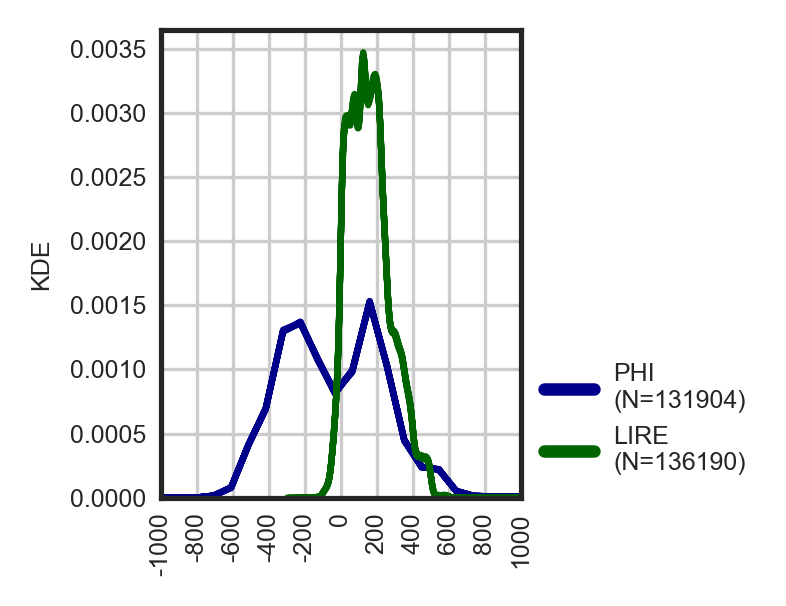

In [54]:
%%time
n_sim = 10

fig, ax1 = plt.subplots(1,1, figsize=[2.6, 2], tight_layout=True)
for data in var_data_phi[:n_sim]:
    sns.kdeplot(data, ax=ax1, color="darkblue")

for data in var_data_lire[:n_sim]:
    sns.kdeplot(data, ax=ax1, color="darkgreen")

# period labels
ax1.set_xlim(-1000, 1000)

ax1.set_xticks(range(-1000,1200,200))
ax1.set_xticklabels(range(-1000,1200,200))
ax1.grid(visible=True)
ax1.set_ylabel("KDE")
ax1.xaxis.set_tick_params(rotation=90)

phi_label = "PHI\n(N={0})".format(str(len(var_data_phi[0])))
lire_label = "LIRE\n(N={0})".format(str(len(var_data_lire[0])))
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in ["darkblue", "darkgreen"]]
plt.legend(markers, [phi_label, lire_label], bbox_to_anchor=(1, 0), loc='lower left')

#plt.legend(loc="lower left", bbox_to_anchor=(1,0))

In [55]:
# if needed, we can easily elaborate on this:
print(PHI["hdr1"].str.contains("Asia Minor").sum())
print(PHI["hdr1"].str.contains("Attica").sum())
print(PHI["hdr1"].str.contains("Central Greece").sum())
print(PHI["hdr1"].str.contains("Egypt").sum())

50935
30015
18502
15161


# Combining Agri and inscriptions

In [ ]:
'lightcyan',
'lightgoldenrodyellow',
'lightgray',
'lightgreen',

In [139]:
len(var_data_phi[0])

131904

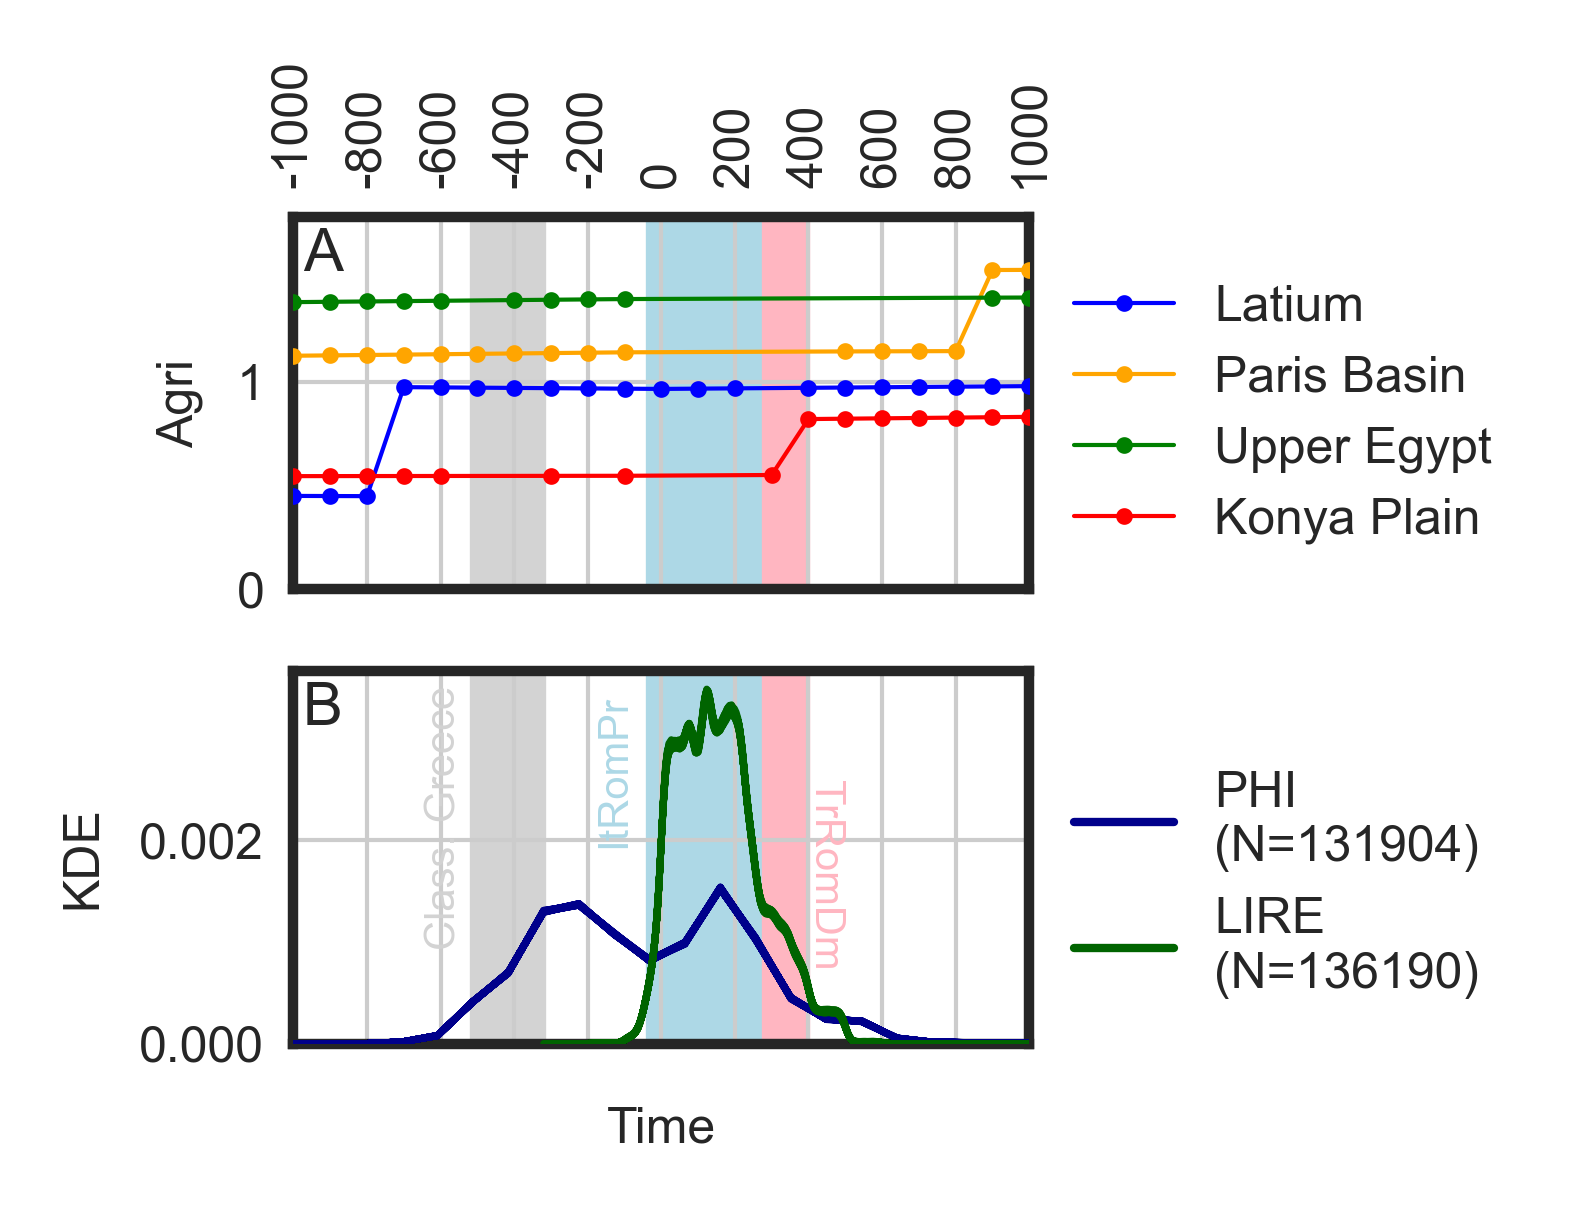

In [166]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(2.6, 2), tight_layout=True)

n_sim = 100

for region, color in zip(NGA_AM, ["blue", "orange", "green", "red"]):
    MSP_AM[MSP_AM["NGA"]==region].plot(x="Time", y="Agri", style="-o", linewidth=0.5, markersize=1, label=region, color=color, ax=ax1, zorder=3)
    #HY.plot(x="Time", y=region, style="o", markersize=0.3, legend=False, linewidth=0.2, color=color, ax=ax1, zorder=3)
#   #    MSP_AM[MSP_AM["NGA"]==region].plot(x="Time", y="Agri", color=color, ax=ax)
ax1.xaxis.set_ticks_position('top') # the rest is the same
ax1.set_xlim(-1000, 1000)
ax1.set_xticks(range(-1000,1200,200))
ax1.set_xticklabels(range(-1000,1200,200))
ax1.set_ylim(0,1.8)
ax1.xaxis.set_tick_params(rotation=90)
ax1.set_xlabel("")
ax1.grid(visible=True, linewidth=0.5)
ax1.xaxis.set_zorder(2)
ax1.yaxis.set_zorder(2)
ax1.set_ylabel("Agri")
ax1.legend(loc="lower left", bbox_to_anchor=(1, 0))

ax1.axvspan(-510,-323, color="lightgrey")

ax1.axvspan(-31,283, color="lightblue", zorder=1)
#ax1.annotate("ItRomPr", xy=(-100,0.0003), xycoords='data', color="lightgoldenrodyellow", rotation=270, fontsize=8, zorder=2)
ax1.axvspan(284, 394, color="lightpink", zorder=1)
#ax1.annotate("TrRomDm", xy=(394,0.0003), xycoords='data', color="lightcyan", rotation=270, fontsize=8, zorder=2)

# ax2 - INSCRIPTIONS
for data in var_data_phi[:n_sim]:
    sns.kdeplot(data, ax=ax2, linewidth=0.8, color="darkblue", zorder=3)

for data in var_data_lire[:n_sim]:
    sns.kdeplot(data, ax=ax2, linewidth=0.8, color="darkgreen", zorder=3)

# period labels
ax2.set_xlim(-1000, 1000)
ax2.set_xticks(range(-1000,1200,200))
ax2.set_xticklabels([])
ax2.grid(visible=True, linewidth=0.5)
ax2.xaxis.set_zorder(2)
ax2.yaxis.set_zorder(2)
ax2.set_ylabel("KDE")
ax2.xaxis.set_tick_params(rotation=90)
ax2.set_xlabel("Time")

ax2.axvspan(-510,-323, color="lightgrey")
ax2.annotate("Class. Greece", xy=(-640,0.001), xycoords='data', color="lightgrey", rotation=90, fontsize=5, zorder=3)
ax2.axvspan(-31,283, color="lightblue", zorder=1)
ax2.annotate("ItRomPr", xy=(-180,0.002), xycoords='data', color="lightblue", rotation=90, fontsize=5, zorder=3)
ax2.axvspan(284, 394, color="lightpink", zorder=1)
ax2.annotate("TrRomDm", xy=(394,0.0008), xycoords='data', color="lightpink", rotation=270, fontsize=5, zorder=3)

ax1.set_title("A", x=0.04, y=0.72)
ax2.set_title("B", x=0.04, y=0.72)


phi_label = "PHI\n(N={0})".format(str(len(var_data_phi[0])))
lire_label = "LIRE\n(N={0})".format(str(len(var_data_lire[0])))
markers = [plt.Line2D([0,0],[0,0],color=color, lw=1) for color in ["darkblue", "darkgreen"]]
ax2.legend(markers, [phi_label, lire_label], bbox_to_anchor=(1, 0), loc='lower left')

In [167]:
save_figure(fig, "Figure 1")

# Shipwrecks

To cite this database please use the following reference: Strauss, J. (2013). Shipwrecks Database. Version 1.0. Accessed (date): oxrep.classics.ox.ac.uk/databases/shipwrecks_database/



In [56]:
resp = requests.get("http://oxrep.classics.ox.ac.uk/docs/StraussShipwrecks.zip")
# look what files we have in the zip archive
myzipfile = ZipFile(BytesIO(resp.content))
for name in myzipfile.namelist():
    print(name)

StraussShipwrecks.xlsx


In [57]:
myzipfile.extractall("../data/StraussShipwrecks")

In [58]:
shipwrecks = pd.read_excel("../data/StraussShipwrecks/StraussShipwrecks.xlsx", sheet_name="Shipwrecks")
shipwrecks.head(5)

,Wreck ID,Strauss ID,Name,Parker Number,Sea area,Country,Region,Latitude,Longitude,Min depth,...,Columns etc,Sarcophagi,Blocks,Marble type,Other cargo,Hull remains,Shipboard paraphernalia,Ship equipment,Estimated tonnage,Amphora type
0,1,331,Komiza,NaN,Adriatic,Croatia,Vis Island,43.03333,16.08333,30.0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,328,Lokunji,NaN,Adriatic,Croatia,Kvarner region,44.70000,14.28333,4.0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,329,Maharac Cape,NaN,Adriatic,Croatia,Mljet island,42.73333,17.66666,3.0,...,False,False,False,NaN,Eastern coarse ware pottery of biconical dishe...,NaN,NaN,NaN,NaN,NaN
3,4,330,Mlin,702,Adriatic,Croatia,Split channel,43.45000,16.23333,25.0,...,False,False,False,NaN,NaN,Remains of the hull.,NaN,"Two lead anchor stocks, though possibly not fr...",NaN,NaN
4,5,322,Plavac B,832,Adriatic,Croatia,"Zlarin Island, central Dalmatia",NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,.,NaN,NaN


In [59]:
shipwrecks.columns

Index(['Wreck ID', 'Strauss ID', 'Name', 'Parker Number', 'Sea area',
       'Country', 'Region', 'Latitude', 'Longitude', 'Min depth', 'Max depth',
       'Depth', 'Period', 'Dating', 'Earliest date', 'Latest date',
       'Date range', 'Mid point of date range', 'Probability',
       'Place of origin', 'Place of destination', 'Reference', 'Comments',
       'Amphorae', 'Marble', 'Columns etc', 'Sarcophagi', 'Blocks',
       'Marble type', 'Other cargo', 'Hull remains', 'Shipboard paraphernalia',
       'Ship equipment', 'Estimated tonnage', 'Amphora type'],
      dtype='object')

In [60]:
len(shipwrecks)

1784

In [61]:
shipwrecks["Region"]

0                            Vis Island
1                        Kvarner region
2                          Mljet island
3                         Split channel
4       Zlarin Island, central Dalmatia
                     ...               
1779                           Sardinia
1780                           Sardinia
1781                            Liguria
1782                             Sicily
1783                           Calabria
Name: Region, Length: 1784, dtype: object

In [62]:
shipwrecks = shipwrecks[(shipwrecks["Earliest date"].between(-1000,1000)) | (shipwrecks["Latest date"].between(-1000,1000))]
len(shipwrecks)

1648

In [63]:
shipwrecks["random_dates"] = shipwrecks.apply(lambda row: tempun.model_date(row["Earliest date"], row["Latest date"], size=1000,), axis=1)

In [64]:
var_data_shipwrecks = []
for var_n in range(1000):
    var_data_shipwrecks.append([var[var_n] for var in shipwrecks["random_dates"] if var !=None])

In [65]:
len(var_data_shipwrecks[0])

1648

CPU times: user 6 s, sys: 2.03 s, total: 8.03 s
Wall time: 13.3 s


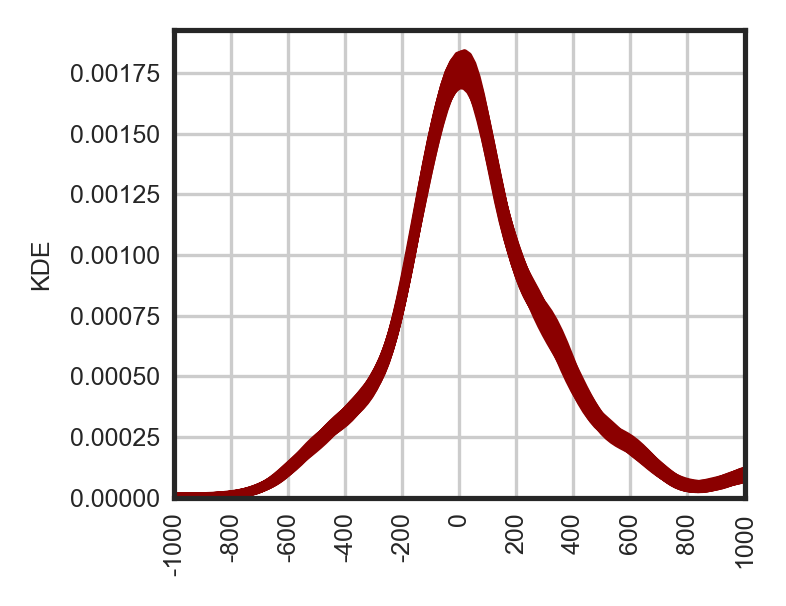

In [66]:
%%time
n_sim = 1000
fig, ax1 = plt.subplots(1,1, figsize=[2.6, 2], tight_layout=True)
for data in var_data_shipwrecks[:n_sim]:
    sns.kdeplot(data, ax=ax1, color="darkred")



# period labels
ax1.set_xlim(-1000, 1000)
ax1.set_xticks(range(-1000,1200,200))
ax1.set_xticklabels(range(-1000,1200,200))
ax1.grid(visible=True)
ax1.set_ylabel("KDE")
ax1.xaxis.set_tick_params(rotation=90)

# Combining all proxies into one figure

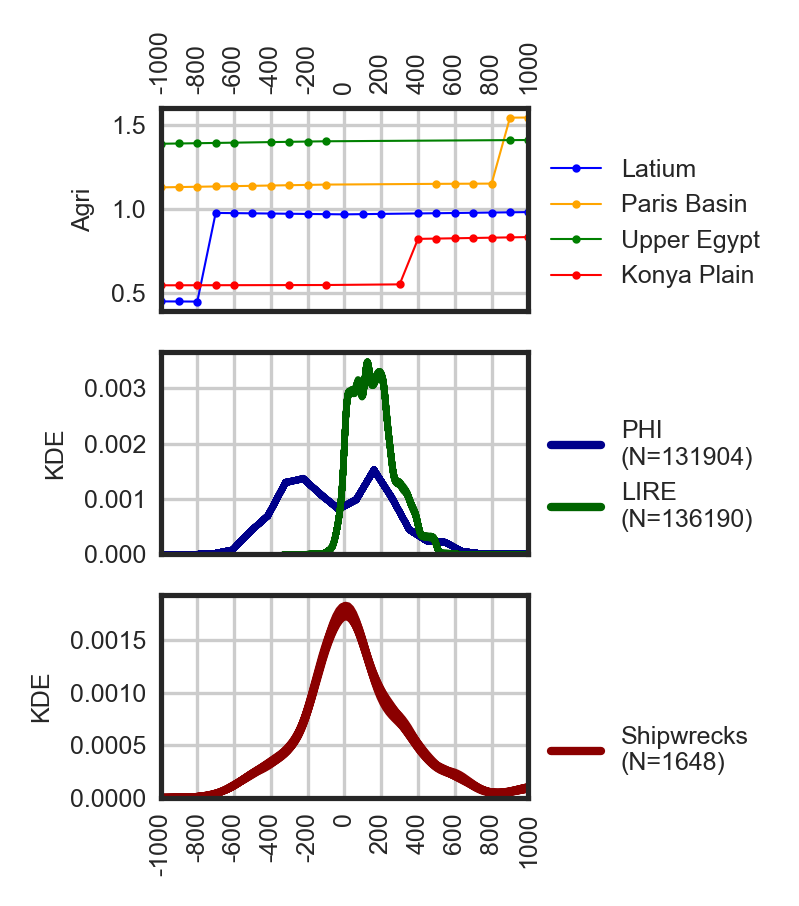

In [367]:
fig, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(2.6, 3), tight_layout=True)

n_sim = 100

for region, color in zip(NGA_AM, ["blue", "orange", "green", "red"]):
    MSP_AM[MSP_AM["NGA"]==region].plot(x="Time", y="Agri", style="-o", markersize=1, linewidth=0.5 ,label=region, color=color, ax=ax1)
#       MSP_AM[MSP_AM["NGA"]==region].plot(x="Time", y="Agri", color=color, ax=ax)
ax1.xaxis.set_ticks_position('top') # the rest is the same
ax1.set_xlim(-1000, 1000)
ax1.set_xticks(range(-1000,1200,200))
ax1.set_xticklabels(range(-1000,1200,200))
ax1.grid(visible=True)
ax1.xaxis.set_tick_params(rotation=90)
ax1.set_xlabel("")


ax1.set_ylabel("Agri")
ax1.legend(loc="lower left", bbox_to_anchor=(1, 0))

# ax2 - INSCRIPTIONS
for data in var_data_phi[:n_sim]:
    sns.kdeplot(data, ax=ax2, color="darkblue")

for data in var_data_lire[:n_sim]:
    sns.kdeplot(data, ax=ax2, color="darkgreen")

# period labels
ax2.set_xlim(-1000, 1000)
ax2.set_xticks(range(-1000,1200,200))
ax2.set_xticklabels([])
ax2.grid(visible=True)
ax2.set_ylabel("KDE")
ax2.xaxis.set_tick_params(rotation=90)

phi_label = "PHI\n(N={0})".format(str(len(var_data_phi[0])))
lire_label = "LIRE\n(N={0})".format(str(len(var_data_lire[0])))
markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in ["darkblue", "darkgreen"]]
ax2.legend(markers, [phi_label, lire_label], bbox_to_anchor=(1, 0), loc='lower left')

# ax3 - SHIPWRECKS
for data in var_data_shipwrecks[:n_sim]:
    sns.kdeplot(data, ax=ax3, color="darkred")
ax3.set_xlim(-1000, 1000)
ax3.set_xticks(range(-1000,1200,200))
ax3.set_xticklabels(range(-1000,1200,200))
ax3.grid(visible=True)
ax3.set_ylabel("KDE")
ax3.xaxis.set_tick_params(rotation=90)

#markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in ["darkblue", "darkgreen"]]
ax3.legend([plt.Line2D([0,0],[0,0],color="darkred", lw=2)], ["Shipwrecks\n(N=1648)"], bbox_to_anchor=(1, 0), loc='lower left')

In [368]:
save_figure(fig, "AM_proxies")